In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Разностная схема

In [3]:
from get_solution_not_const_k import get_solution

x_left, x_right = 0.1, 0.8
UA, UB = 6.0, 0.6
n = 150


def f(x):
    return x


def q(x):
    return 0


def apply_boundary_conditions(a, b, c, d, h):
    a[0] = 1
    b[0] = UA
    a[-1] = 1
    b[-1] = UB

## Разные k(x)

In [4]:
from typing import List, Tuple, Any


def create_plot(k_funcs: List[Tuple[Any, str]]):
    for k_func, describton in k_funcs:
        u, x = get_solution(k_func, q, f, apply_boundary_conditions, n, x_left, x_right)
        plt.plot(x, u, label=describton)
    plt.legend()
    plt.grid(True)

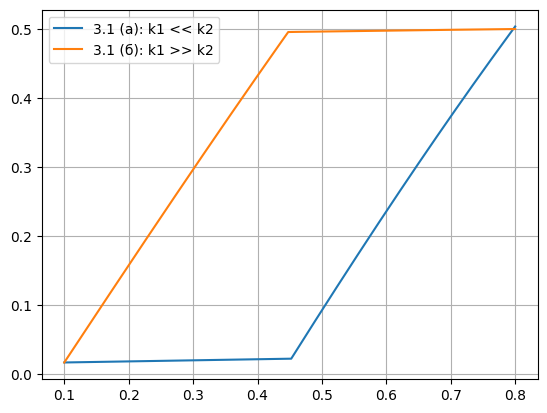

In [5]:
k_funcs = []


def create_K(k1, k2):
    def K(x):
        if x_left <= x <= 0.5 * (x_right + x_left):
            return k1
        if 0.5 * (x_left + x_right) < x <= x_right:
            return k2

    return K


k_funcs.append((create_K(100, 1), "3.1 (a): k1 << k2"))
k_funcs.append((create_K(1, 100), "3.1 (б): k1 >> k2"))

create_plot(k_funcs)

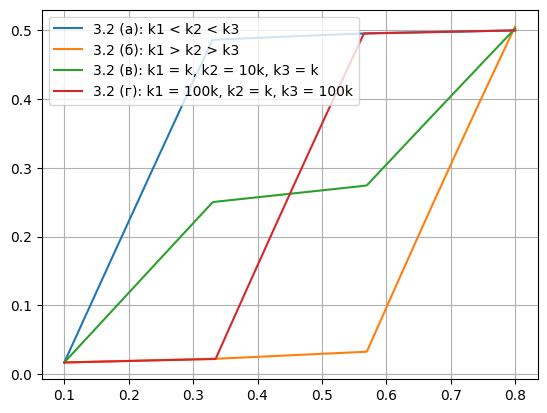

In [6]:
k_funcs = []


def create_K(k1, k2, k3):
    def K(x):
        if x_left <= x <= x_left + (x_right - x_left) / 3:
            return k1
        if x_left + (x_right - x_left) / 3 <= x <= x_left + 2 * (x_right - x_left) / 3:
            return k2
        if x_left + 2 * (x_right - x_left) / 3 < x <= x_right:
            return k3

    return K


k_funcs.append((create_K(1, 50, 100), "3.2 (а): k1 < k2 < k3"))
k_funcs.append((create_K(100, 50, 1), "3.2 (б): k1 > k2 > k3"))
k_funcs.append((create_K(10, 100, 10), "3.2 (в): k1 = k, k2 = 10k, k3 = k"))
k_funcs.append((create_K(100, 1, 100), "3.2 (г): k1 = 100k, k2 = k, k3 = 100k"))

create_plot(k_funcs)

## f(x) — точечный источник тепла

In [44]:
from typing import List, Tuple, Any


def create_plot(f_funcs: List[Tuple[Any, str]]):
    for f_func, describton in f_funcs:
        u, x = get_solution(lambda x: x, q, f_func, apply_boundary_conditions, n, x_left, x_right)
        plt.plot(x, u, label=describton)
    plt.legend()
    plt.grid(True)

In [62]:
from scipy import signal

f_funcs = []


# def d(x, x0):
#     if isinstance(x, float):
#         return 1 if x == x0 else 0
#     res = np.zeros(len(x))
#     for i, x_item in enumerate(x):
#         res[i] = 1 if x_item == x0 else 0
#     return res

def d(x, x0):
    return signal.unit_impulse(len(x), np.abs(x - x0).argmin())


def create_one_f(c, x0):
    def f(x):
        return c * d(x, x0)

    return f


def create_two_f(c1, x01, c2, x02):
    def f1(x):
        return c1 * d(x, x01)

    def f2(x):
        return c2 * d(x, x02)

    def f(x):
        return f1(x) + f2(x)

    return f


f_funcs.append((create_one_f(1, (x_right - x_left) / 2), "f1"))
f_funcs.append((create_two_f(1, (x_right - x_left) / 4, 1, 3 * (x_right - x_left) / 4), "f2"))
f_funcs.append((create_two_f(1, (x_right - x_left) / 4, 5, 3 * (x_right - x_left) / 4), "f3"))
f_funcs.append((create_two_f(1, x_left + 0.1, 2, x_left + 0.2), "f4"))

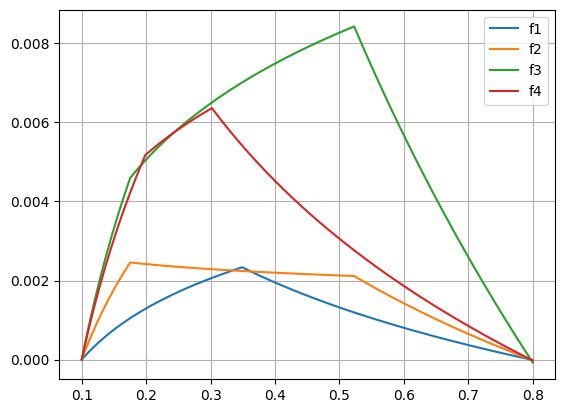

In [63]:
create_plot(f_funcs)

In [34]:
create_plot(f_funcs)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed